In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score,accuracy_score


In [2]:
df=pd.read_csv("diabetes.csv")
print(df.head() ) 
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  
(768, 9)


In [3]:
print(df.describe() )
zero_not_accepted=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]
for column in zero_not_accepted:     
    df[column]=df[column].replace(0,np.NaN)     
    mean=int(df[column].mean(skipna=True))     
    df[column]=df[column].replace(np.NaN,mean) 
    df["Glucose"] 
X=df.iloc[:,0:8] 
y=df.iloc[:,8] 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2) 
#feature Scaling 
sc_X=StandardScaler() 
X_train=sc_X.fit_transform(X_train) 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    Pedigree         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.

In [4]:
X_test=sc_X.transform(X_test) 
knn=KNeighborsClassifier(n_neighbors=11) 

In [5]:
knn.fit(X_train,y_train) 

KNeighborsClassifier(n_neighbors=11)

In [6]:
y_pred=knn.predict(X_test) 

In [7]:
#Evaluate The Model
cf_matrix=confusion_matrix(y_test,y_pred) 
 

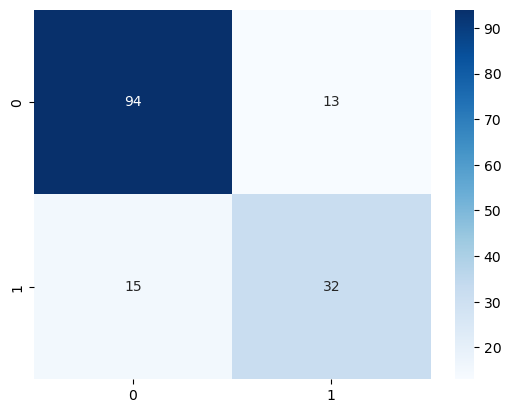

In [8]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues') 

In [9]:
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
 

Text(4.444444444444452, 0.5, 'Actual Values ')

In [12]:
##Display the visualization of the Confusion Matrix. plt.show() 
